# LSTM For Beer Production In Australlia

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Dataset

In [2]:
dataframe = pd.read_csv('monthly-beer-production-in-austr.csv', index_col = 'Month', parse_dates = True)

# Exploratory Data Analysis

The process of analyzing and understanding a dataset to gain insights and identify patterns or trends. The goal of exploring the data is to become familiar with its structure, distribution, and quality, as well as to identify potential issues or anomalies that may need to be addressed before further analysis.

In [3]:
dataframe.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [4]:
dataframe.tail()

,Monthly beer production
Month,
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0
1995-07-01,119.0
1995-08-01,153.0


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [6]:
dataframe.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [7]:
dataframe.isna().sum()

Monthly beer production    0
dtype: int64

<AxesSubplot:xlabel='Month'>

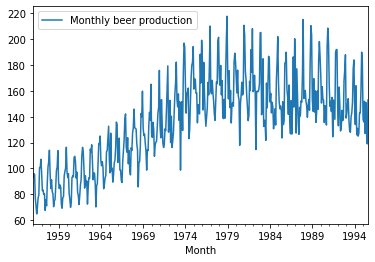

In [8]:
dataframe.plot()

In [9]:
len(dataframe)

476

In [11]:
test_size = 18

In [12]:
test_index = len(dataframe) - test_size

In [13]:
test_index

458

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

In [14]:
train_dataframe = dataframe.iloc[:test_index]
test_dataframe = dataframe.iloc[test_index:]

In [15]:
test_dataframe

,Monthly beer production
Month,
1994-03-01,164.0
1994-04-01,126.0
1994-05-01,131.0
1994-06-01,125.0
1994-07-01,127.0
1994-08-01,143.0
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0


In [16]:
train_dataframe

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1993-10-01,151.0
1993-11-01,177.0
1993-12-01,184.0


# Scaling

Scaling is a common preprocessing step in data analysis and machine learning. It involves transforming the features of a dataset to a standard scale, which can help improve the performance and stability of models

MinMaxScaler is a popular scaling technique used in data preprocessing. It scales the features to a specified range, typically between 0 and 1.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_dataframe)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train_dataframe)
scaled_test = scaler.transform(test_dataframe)

In [21]:
scaled_train

array([[0.18562092],
       [0.20392157],
       [0.19869281],
       [0.08039216],
       [0.03986928],
       [0.        ],
       [0.03464052],
       [0.08169935],
       [0.09607843],
       [0.23398693],
       [0.23464052],
       [0.27647059],
       [0.20326797],
       [0.11764706],
       [0.12091503],
       [0.09934641],
       [0.10196078],
       [0.01764706],
       [0.07124183],
       [0.04117647],
       [0.16013072],
       [0.2372549 ],
       [0.26405229],
       [0.32222222],
       [0.20588235],
       [0.12810458],
       [0.17254902],
       [0.11176471],
       [0.10261438],
       [0.03660131],
       [0.06535948],
       [0.07254902],
       [0.14052288],
       [0.22156863],
       [0.23594771],
       [0.32026144],
       [0.16339869],
       [0.12810458],
       [0.14640523],
       [0.13594771],
       [0.04705882],
       [0.02875817],
       [0.08300654],
       [0.0869281 ],
       [0.19281046],
       [0.21503268],
       [0.23137255],
       [0.337

In [22]:
scaled_test

array([[0.64836601],
       [0.4       ],
       [0.43267974],
       [0.39346405],
       [0.40653595],
       [0.51111111],
       [0.51111111],
       [0.62222222],
       [0.81830065],
       [0.76601307],
       [0.47843137],
       [0.46535948],
       [0.56993464],
       [0.40653595],
       [0.56339869],
       [0.42614379],
       [0.35424837],
       [0.57647059]])

# Timeseries Generator

In time series analysis, a common approach is to use a time series generator to generate batches of sequential data for training recurrent neural networks (RNNs) or other time-based models. This allows you to efficiently process and train models on large time series datasets. Here's an example of how you can create a time series generator using the TimeseriesGenerator calss.

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [26]:
n_features = 1

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [27]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [29]:
model.compile(optimizer='adam', loss='mse')

In [30]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [33]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stopping])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11472\3351939425.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


Epoch 1/20
446/446 [==============================] - 14s 19ms/step - loss: 0.0227 - val_loss: 0.0462
Epoch 2/20
446/446 [==============================] - 10s 22ms/step - loss: 0.0148 - val_loss: 0.0118
Epoch 3/20
446/446 [==============================] - 11s 25ms/step - loss: 0.0098 - val_loss: 0.0139
Epoch 4/20
446/446 [==============================] - 8s 19ms/step - loss: 0.0091 - val_loss: 0.0107
Epoch 5/20
446/446 [==============================] - 8s 19ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 6/20
446/446 [==============================] - 9s 21ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 7/20
446/446 [==============================] - 9s 19ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 8/20
446/446 [==============================] - 8s 18ms/step - loss: 0.0069 - val_loss: 0.0073


In [34]:
loss = pd.DataFrame(model.history.history)

In [35]:
loss.head()

,loss,val_loss
0,0.022651,0.046185
1,0.014845,0.011761
2,0.009823,0.013869
3,0.009089,0.010725
4,0.008498,0.007736


<AxesSubplot:>

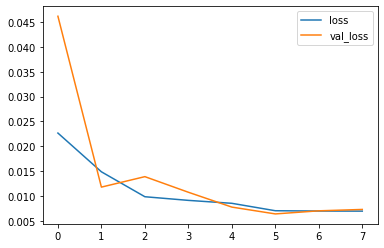

In [36]:
loss.plot()

# Predicting On Test Dataframe

In [37]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test_dataframe)):

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred) 

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 66ms/step


In [38]:
test_prediction = scaler.inverse_transform(test_predictions)

In [39]:
test_prediction

array([[155.98680775],
       [157.00070583],
       [147.11576729],
       [142.30979429],
       [142.81405764],
       [148.08512567],
       [152.98310541],
       [165.74371748],
       [183.62692283],
       [185.09654109],
       [162.88406693],
       [155.61309932],
       [163.78607773],
       [162.5416749 ],
       [155.99329172],
       [152.41410266],
       [152.63977407],
       [155.94187592]])

In [40]:
test_dataframe['Prediction'] = test_prediction

C:\Users\DELL\AppData\Local\Temp\ipykernel_11472\4208336148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataframe['Prediction'] = test_prediction


In [41]:
test_dataframe

,Monthly beer production,Prediction
Month,,
1994-03-01,164.0,155.986808
1994-04-01,126.0,157.000706
1994-05-01,131.0,147.115767
1994-06-01,125.0,142.309794
1994-07-01,127.0,142.814058
1994-08-01,143.0,148.085126
1994-09-01,143.0,152.983105
1994-10-01,160.0,165.743717
1994-11-01,190.0,183.626923


# Test Predicting VS Monthly Production

<AxesSubplot:xlabel='Month'>

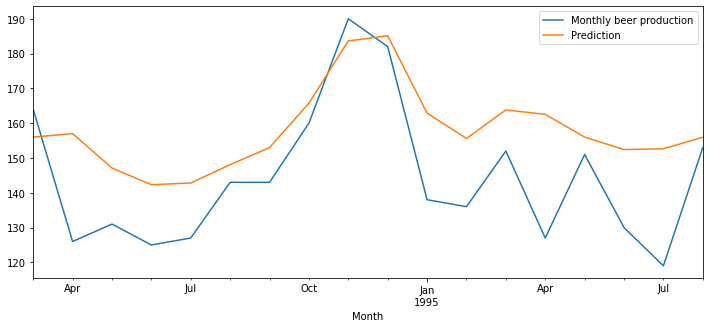

In [44]:
test_dataframe.plot(figsize = (12, 5))

# Predicting On Full Dataframe

In [45]:
full_scaled = MinMaxScaler()

In [49]:
scaled_full_data = full_scaled.fit_transform(dataframe)

In [50]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [51]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='mse')

In [54]:
model.fit_generator(generator,epochs=10)

Epoch 1/10


C:\Users\DELL\AppData\Local\Temp\ipykernel_11472\3818026791.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10)


464/464 [==============================] - 11s 13ms/step - loss: 0.0241
Epoch 2/10
464/464 [==============================] - 6s 12ms/step - loss: 0.0131
Epoch 3/10
464/464 [==============================] - 7s 16ms/step - loss: 0.0104
Epoch 4/10
464/464 [==============================] - 9s 18ms/step - loss: 0.0088
Epoch 5/10
464/464 [==============================] - 7s 15ms/step - loss: 0.0086
Epoch 6/10
464/464 [==============================] - 8s 16ms/step - loss: 0.0079
Epoch 7/10
464/464 [==============================] - 7s 15ms/step - loss: 0.0081
Epoch 8/10
464/464 [==============================] - 10s 22ms/step - loss: 0.0071
Epoch 9/10
464/464 [==============================] - 8s 17ms/step - loss: 0.0074
Epoch 10/10
464/464 [==============================] - 9s 18ms/step - loss: 0.0071


In [55]:
model.save('model_beer_production.h5')

In [56]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

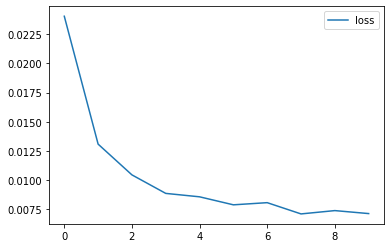

In [57]:
loss.plot()

In [58]:
predict = []
periods = 18

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    current_pred = model.predict(current_batch)[0]

    predict.append(current_pred) 

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 73ms/step


In [59]:
predict = scaler.inverse_transform(predict)

In [60]:
predict

array([[154.37167858],
       [172.74515795],
       [190.32668077],
       [179.20578407],
       [149.97382193],
       [151.1499561 ],
       [151.77298282],
       [144.4505447 ],
       [148.68584608],
       [138.03215559],
       [139.2346953 ],
       [153.70972978],
       [163.08687572],
       [180.0520017 ],
       [190.66236995],
       [179.78027676],
       [161.10820638],
       [159.62570225]])

In [76]:
predict_index = pd.date_range(start = '1995-08-01', periods = periods, freq = 'MS')

In [77]:
predict_df = pd.DataFrame(data = predict,
                          index = predict_index, 
                          columns = ['Prediction'])

In [78]:
predict_df

,Prediction
1995-08-01,154.371679
1995-09-01,172.745158
1995-10-01,190.326681
1995-11-01,179.205784
1995-12-01,149.973822
1996-01-01,151.149956
1996-02-01,151.772983
1996-03-01,144.450545
1996-04-01,148.685846
1996-05-01,138.032156


<AxesSubplot:xlabel='Month'>

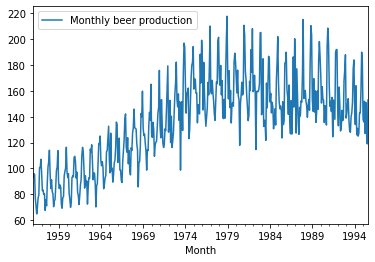

In [79]:
dataframe.plot()

<AxesSubplot:>

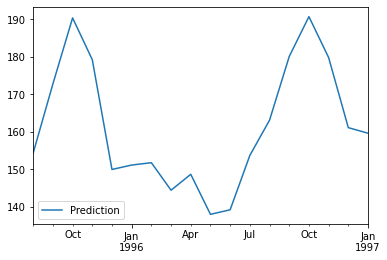

In [80]:
predict_df.plot()

<AxesSubplot:xlabel='Month'>

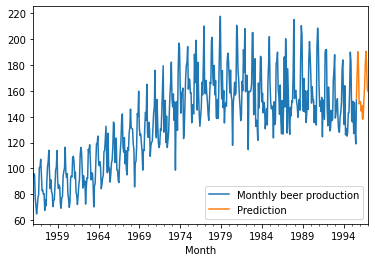

In [83]:
ax = dataframe.plot()
predict_df.plot(ax=ax)

# Actual Production And Predicted Preoduction

The graph shows the actual prediction of beer along with prediction of beer production in comming 18 month.

(290.0, 325.0)

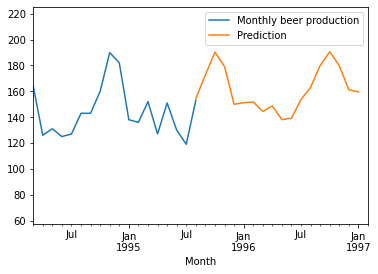

In [81]:
ax = dataframe.plot()
predict_df.plot(ax=ax)
plt.xlim('1994-03-01','1997-02-01')